In [56]:
import warnings
warnings.filterwarnings('ignore')

import os # M1은 노필요
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [57]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled , val_scaled, train_target, val_target = train_test_split(
    train_scaled , train_target , test_size= 0.2, random_state=42
)

In [58]:
# Model 함수 구현
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = "softmax"))
    return model

In [59]:
model = model_fn()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled , train_target , epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5385 - accuracy: 0.8105
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3225 - accuracy: 0.8861


In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

### 손실 곡선

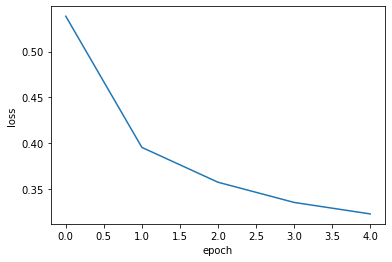

In [62]:
# 손실곡선 시각화 loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch') # epochs 5번
plt.ylabel('loss')
plt.show()

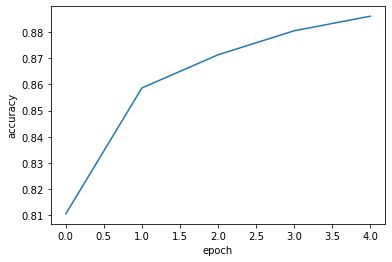

In [63]:
# 손실곡선 시각화 accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch') # epochs 5번
plt.ylabel('accuracy')
plt.show()

---
### 반복 훈련의 증가

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled , train_target , epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5232 - accuracy: 0.8171
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3537 - accuracy: 0.8744
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8800
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8862
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3062 - accuracy: 0.8918
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.8955
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2898 - accuracy: 0.8969
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.8999
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.277

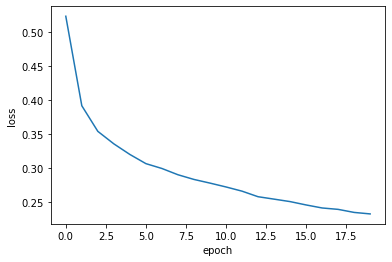

In [ ]:
# 손실곡선 시각화 loss
plt.plot(history.history['loss'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('loss')
plt.show()

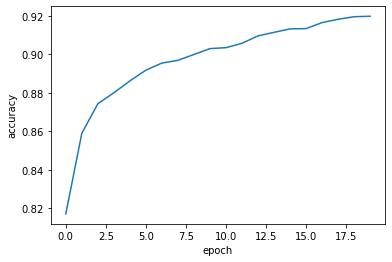

In [ ]:
# 손실곡선 시각화 accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('accuracy')
plt.show()

정확도가 왔다갔다 하는 모습도 보인다.

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy' )
history = model.fit(
    train_scaled , train_target, epochs = 20 , validation_data =(val_scaled , val_target)
)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5326 - accuracy: 0.8124 - val_loss: 0.4375 - val_accuracy: 0.8392
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3902 - accuracy: 0.8605 - val_loss: 0.3921 - val_accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3534 - accuracy: 0.8727 - val_loss: 0.3859 - val_accuracy: 0.8691
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3325 - accuracy: 0.8801 - val_loss: 0.3601 - val_accuracy: 0.8776
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3171 - accuracy: 0.8849 - val_loss: 0.3570 - val_accuracy: 0.8756
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3078 - accuracy: 0.8907 - val_loss: 0.3753 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2991 - accuracy: 0.8941 - val_loss: 0.3663 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

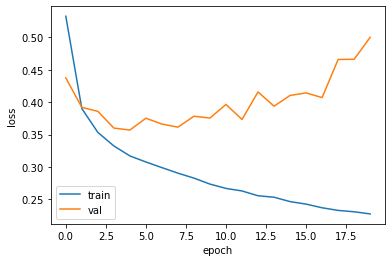

In [ ]:
# 손실곡선 시각화 loss 
# 과대적합 볼 때 loss 로 자주 봄
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

엄청난 과대적합 모델이다

> 훈련 세트는 epoch가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epoch의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.

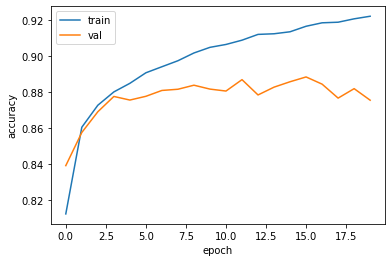

In [ ]:
# 손실곡선 시각화 accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('accuracy')
plt.legend(['train' , 'val'])
plt.show()

---
# Optimizer 사용

Adam

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy' , optimizer = 'adam')
history = model.fit(
    train_scaled , train_target, epochs = 20 , validation_data =(val_scaled , val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5261 - accuracy: 0.8171 - val_loss: 0.4266 - val_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3961 - accuracy: 0.8581 - val_loss: 0.3901 - val_accuracy: 0.8604
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3530 - accuracy: 0.8735 - val_loss: 0.3628 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3263 - accuracy: 0.8809 - val_loss: 0.3389 - val_accuracy: 0.8774
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.8867 - val_loss: 0.3342 - val_accuracy: 0.8778
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8901 - val_loss: 0.3141 - val_accuracy: 0.8888
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8968 - val_loss: 0.3327 - val_accuracy:

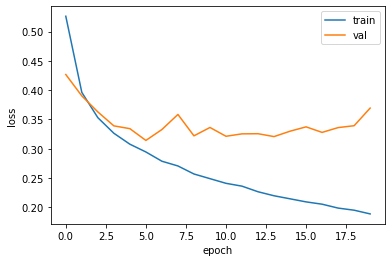

In [ ]:
# 손실곡선 시각화 loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

아까보다는 나아졌지만 아직 과대적합이 해결되지 않았다.

> 훈련 세트는 epoch가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epoch의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.        
> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증 손실에 대한 부분 (과대적합)은 아직 해결이 안됨

---
# Dropout
- 규제
- 신경망 모델에만 있다.
- 훈련시에만 각 sample을 처리할 때 은닉층의 임의의 node를 계산에 포함시키지 않는다.

In [ ]:
# model에 dropout을 추가
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy' , optimizer = 'adam')
history = model.fit(
    train_scaled , train_target, epochs = 20 , validation_data =(val_scaled , val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6015 - accuracy: 0.7904 - val_loss: 0.4302 - val_accuracy: 0.8442
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4425 - accuracy: 0.8413 - val_loss: 0.4118 - val_accuracy: 0.8513
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4048 - accuracy: 0.8535 - val_loss: 0.3701 - val_accuracy: 0.8645
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8605 - val_loss: 0.3552 - val_accuracy: 0.8699
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3667 - accuracy: 0.8666 - val_loss: 0.3530 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3545 - accuracy: 0.8700 - val_loss: 0.3529 - val_accuracy: 0.8713
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8736 - val_loss: 0.3360 - val_accuracy:

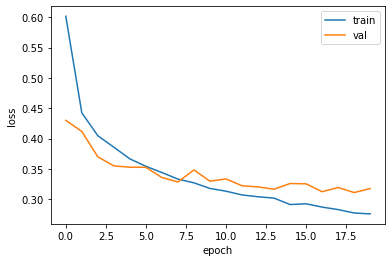

In [ ]:
# 손실곡선 시각화 loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

> epoch가 10일 경우가 train과 val의 차이가 적은 것 같다.    
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epoch의 갯수를 선택한다.

---
### 모델의 저장과 복원
- hdf5 format 으로 저장 (deep learning에 가장 적합하게 만들어짐)

In [ ]:
# model 저장
model.save('../Data/model_whole.h5')

In [ ]:
# model 복원
model = keras.models.load_model('../Data/model_whole.h5')

In [ ]:
# 사용
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8898


[0.31783953309059143, 0.8897500038146973]

---
# Callbacks 함수
- 훈련수행시 손실값이 제일 작은 함수를 저장해 준다. <- 굉장히 편함

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy' , optimizer = 'adam')
# callbacks 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5" )
model.fit(train_scaled , train_target, epochs = 20 , 
            validation_data =(val_scaled , val_target),
            callbacks = [checkpoint_cb]
            )

Epoch 1/20
1474/1500 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.7917
Epoch 1: saving model to ../Data/best-model.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5884 - accuracy: 0.7920 - val_loss: 0.4305 - val_accuracy: 0.8436
Epoch 2/20
1475/1500 [============================>.] - ETA: 0s - loss: 0.4374 - accuracy: 0.8419
Epoch 2: saving model to ../Data/best-model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4375 - accuracy: 0.8420 - val_loss: 0.4055 - val_accuracy: 0.8445
Epoch 3/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8539
Epoch 3: saving model to ../Data/best-model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.8539 - val_loss: 0.3639 - val_accuracy: 0.8686
Epoch 4/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.3808 - accuracy: 0.8611
Epoch 4: saving model to ../Data/best-model.h5
1500/1500 [==========

In [ ]:
model = keras.models.load_model('../Data/best-model.h5')
model.evaluate(val_scaled , val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3258 - accuracy: 0.8858


[0.3258150815963745, 0.8858333230018616]

---
# Early stopping(조기 종료)
- Callbacks 처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.

In [67]:
from lightgbm import early_stopping


model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy' , optimizer = 'adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5" , verbose = 1 , monitor='val_loss' , save_best_only=True,  mode='min')
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping( patience=2, restore_best_weights= True, verbose = 1 , monitor='val_loss' ,  mode='min')
# patience 참을성 : 2번 참을게
# 가중치 값을 꼭 적어놔야 한다.(True를 해줘야 2번 참고 2번 전의 제일 좋은 가중치 모델 저장한다. 안쓰면 2번 전의 가중치를 모름) 

history = model.fit(train_scaled , train_target, epochs = 20 , 
            validation_data =(val_scaled , val_target),
            callbacks = [checkpoint_cb , early_stopping_cb]
            )

Epoch 1/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.5888 - accuracy: 0.7932
Epoch 1: val_loss improved from inf to 0.43216, saving model to ../Data/best-model.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5881 - accuracy: 0.7935 - val_loss: 0.4322 - val_accuracy: 0.8439
Epoch 2/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.8403
Epoch 2: val_loss improved from 0.43216 to 0.39805, saving model to ../Data/best-model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4398 - accuracy: 0.8405 - val_loss: 0.3981 - val_accuracy: 0.8546
Epoch 3/20
1473/1500 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8508
Epoch 3: val_loss improved from 0.39805 to 0.37069, saving model to ../Data/best-model.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4076 - accuracy: 0.8507 - val_loss: 0.3707 - val_accuracy: 0.8664
Epoch 4/20
1490/1500 [===================

In [70]:
# 몇번쨰 epoch에서 stop 되었는가?
early_stopping_cb.stopped_epoch # count 0 부터 시작 , epoch는 1부터 시작해서 1 차이가 난다
# 14번째 epoch에서 멈춘것. 12번쨰 epoch를 저장

13

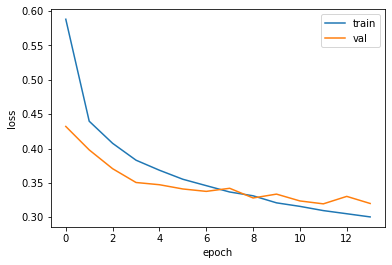

In [69]:
# 손실곡선 시각화 loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch') # epochs 20번
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

---